<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-параметров-квартир" data-toc-modified-id="Изучение-параметров-квартир-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучение параметров квартир</a></span></li><li><span><a href="#Сколько-времени-занимает-в-среднем-продажа-квартиры?" data-toc-modified-id="Сколько-времени-занимает-в-среднем-продажа-квартиры?-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Сколько времени занимает в среднем продажа квартиры?</a></span></li><li><span><a href="#Факторы,-влияющие-на-стоимость-квартиры" data-toc-modified-id="Факторы,-влияющие-на-стоимость-квартиры-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Факторы, влияющие на стоимость квартиры</a></span></li><li><span><a href="#Зависимость-цены-от-времени-публикации" data-toc-modified-id="Зависимость-цены-от-времени-публикации-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Зависимость цены от времени публикации</a></span></li><li><span><a href="#Населенные-пункты-с-самым-большим-числом-публикаций" data-toc-modified-id="Населенные-пункты-с-самым-большим-числом-публикаций-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Населенные пункты с самым большим числом публикаций</a></span></li><li><span><a href="#Выделение-центральной-зоны-в-Санкт-Петербурге" data-toc-modified-id="Выделение-центральной-зоны-в-Санкт-Петербурге-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Выделение центральной зоны в Санкт-Петербурге</a></span></li><li><span><a href="#Изучение-объявлений-в-центре-Санкт-Петербурга" data-toc-modified-id="Изучение-объявлений-в-центре-Санкт-Петербурга-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Изучение объявлений в центре Санкт-Петербурга</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd #импорт библиотек
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('datasets\\real_estate_data.csv', sep='\t')
display(df.head(10))
#открываем файл, получаем первое впечатление от данных

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
df.info() #просмотр общей информации

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Описание данных**
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

### Вывод

В столбце `"is_apartment"` указан тип данных object, но по факту представлен буллев тип, в предобработке следует его изменить. Также столбец с датой публикации `"first_day_exposition"` нужно будет перевести в правильный тип даты **datetime**. 
Во многих столбцах есть пропуски.

## Предобработка данных

In [5]:
df['publication_date'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d') #вывод правильной даты публикации 
df = df.drop(columns='first_day_exposition', axis=1) #удаляем ненужный столбец со старой датой

Я долго думала над столбцом с указанием апартаментов, заполненных значений в нем всего 11.7%  от всего датафрейма. Возможно, отдельное обозначение апартаментов появилось позднее, и все старые объявления автоматически получили пропуски, к тому же сама доля продаваемых апартаментов могла вырасти. (к слову, до этого я уже пробовала переводить столбец в типу bool сразу без заполнения пропусков, и он меняет их все на True, что определенно выбивается из реальности).

In [6]:
df['publication_year'] = pd.DatetimeIndex(df['publication_date']).year
df.groupby('publication_year')['is_apartment'].value_counts()
# выделим столбец с годом публикаций объявлений, 
# сгруппируем данные по нему и посмотрим, сколько было апартаментов в продаже

publication_year  is_apartment
2014              False            26
                  True              2
2015              False           324
                  True              3
2016              False           874
                  True              4
2017              False           836
                  True              4
2018              False           432
                  True             29
2019              False           233
                  True              8
Name: is_apartment, dtype: int64

В 2014 было два апартамента на продажу, в 2019 - 8. Поэтому я считаю, что все пропуски стоит заменить на буллев тип False - и это больше похоже на правду, все-таки доля апартаментов на рынке меньше, чем обычных квартир.

In [7]:
df['is_apartment'] = (df['is_apartment']
                      .fillna('False')
                      .astype('bool')
                     )
# заполнили пропуски, сменили тип данных

In [8]:
df.isna().sum() # выведем общее число пропусков 

total_images               0
last_price                 0
total_area                 0
rooms                      0
ceiling_height          9195
floors_total              86
living_area             1903
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2278
balcony                11519
locality_name             49
airports_nearest        5542
cityCenters_nearest     5519
parks_around3000        5518
parks_nearest          15620
ponds_around3000        5518
ponds_nearest          14589
days_exposition         3181
publication_date           0
publication_year           0
dtype: int64

Есть столбцы с пропусками, в которых представлены категориальные данные. Например, столбец с указанием количества балконов. Велика вероятность, что их в представленном помещении нет, если есть пропуск в данных. Или, допустим, столбцы о наличии в радиусе 3000 метров прудов и парков, если таковые не представлены, то все связанные с этими данными столбцы так же будут не заполнены, ведь эти данные подгружались автоматически на основе картографических данных. 
Таким образом, если в объявлении нет данных о прудах или парках в ближайшем радиусе от продаваемой квартиры, мы можем поставить в пропуски нули.

In [9]:
df['balcony'] = df['balcony'].fillna(0) # убираем пропуски в балконах

In [10]:
print(df['parks_nearest'].isna().sum() / df.shape[0]) # доля пропущенных значений в столбце с прудами.

0.6590995400649816


Пропущенные значения составляют от 23 процентов до 65,9, это много. И если данные о наличии парков или прудов имеют меньший процент пропусков, то отсутствующих данных о расстоянии до них больше в три раза. Слишком много пропусков, чтобы однозначно заполнить их нулями, или удалить, или заполнить медианным значением, на мой взгляд лучше их оставить как есть.

In [11]:
df['cityCenters_nearest'].median()

13098.5

In [12]:
#for row in ['parks_nearest', 'ponds_around3000', 'ponds_nearest', 
            #'parks_around3000', 'airports_nearest', 'cityCenters_nearest']:
    #df[row] = df[row].where(
        #(df[row].isna() == False), 0)

Пропусков в столбце с количеством этажей критически мало, чтобы на них зацикливаться. Куда интереснее высота потолков, в нем есть пропуски, а еще есть выбросы - например, высота в сто метров. Остановимся на более приземленных значениях, хотя бы в пределах до пяти метров высоты, выбивающиеся значения заполним медианой.

In [13]:
df['ceiling_height'] = df['ceiling_height'].where((1 <= df['ceiling_height']) & 
                                                  (df['ceiling_height'] <= 5), df['ceiling_height'].median())

# для значений потолков, не соответствующих условиям, подставим медиану - избавимся от неправильных значений и пропусков.

In [14]:
df['locality_name'] = df['locality_name'].fillna('unknown') 
# думаю, неизвестные населенные пункты можно обозначить как "неизвестные", 
#возможно это пригодится в дальнейшем.

In [15]:
print((df['total_area'] / df['living_area']).median())
print((df['total_area'] / df['kitchen_area']).median())

1.7609977447984868
5.8


In [16]:
(df['total_area'] / df['living_area']).median() #пропуски в жилой площади и площади кухни
df['living_area'] = df['living_area'].fillna(df['total_area'] / 1.761)
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] / 5.8)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   total_images         23699 non-null  int64         
 1   last_price           23699 non-null  float64       
 2   total_area           23699 non-null  float64       
 3   rooms                23699 non-null  int64         
 4   ceiling_height       23699 non-null  float64       
 5   floors_total         23613 non-null  float64       
 6   living_area          23699 non-null  float64       
 7   floor                23699 non-null  int64         
 8   is_apartment         23699 non-null  bool          
 9   studio               23699 non-null  bool          
 10  open_plan            23699 non-null  bool          
 11  kitchen_area         23699 non-null  float64       
 12  balcony              23699 non-null  float64       
 13  locality_name        23699 non-

In [19]:
df.isna().sum()

total_images               0
last_price                 0
total_area                 0
rooms                      0
ceiling_height             0
floors_total              86
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        5542
cityCenters_nearest     5519
parks_around3000        5518
parks_nearest          15620
ponds_around3000        5518
ponds_nearest          14589
days_exposition         3181
publication_date           0
publication_year           0
dtype: int64

Пока остановимся на таких итогах, все важные столбцы откорректировали, пропуски изучили и проанализировали.

## Расчёты и добавление результатов в таблицу

Итак, нам требуется рассчитать и добавить в таблицу:
* цену квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж квартиры; варианты — первый, последний, другой;
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [20]:
df['publication_weekday'] = df['publication_date'].dt.weekday # день недели

df['publication_month'] = pd.DatetimeIndex(df['publication_date']).month # месяц

# столбец с годом публикации я уже добавила в предобработке

#расчет цены за квадратный метр - создадим новый столбец
df['price_per_meter'] = (df['last_price'] / df['total_area']).astype('int')

# соотношение жилой и общей площади
df['living_area_ratio'] = df['living_area'] / df['total_area']

# соотношение площади кухни к общей 
df['kitchen_area_ratio'] = df['kitchen_area'] / df['total_area']

In [21]:
# сделаем функцию для категоризации этажа квартиры, затем создадим с ее помощью нужный столбец

def floor_category(df):
    floor = df['floor']
    floors = df['floors_total']
    if floor == 1:
        return 'Первый'
    if floor == floors:
        return 'Последний'
    return 'Другой'

df['floor_category'] = df.apply(floor_category, axis=1)

In [22]:
display(df.head(10)) # самопроверка

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,publication_date,publication_year,publication_weekday,publication_month,price_per_meter,living_area_ratio,kitchen_area_ratio,floor_category
0,20,13000000.0,108.00,3,2.70,16.0,51.000000,8,True,False,False,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,2019-03-07,2019,3,3,120370,0.472222,0.231481,Другой
1,7,3350000.0,40.40,1,2.65,11.0,18.600000,1,True,False,False,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,2018-12-04,2018,1,12,82920,0.460396,0.272277,Первый
2,10,5196000.0,56.00,2,2.65,5.0,34.300000,4,True,False,False,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2015-08-20,2015,3,8,92785,0.612500,0.148214,Другой
3,0,64900000.0,159.00,3,2.65,14.0,90.289608,9,True,False,False,27.413793,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,2015-07-24,2015,4,7,408176,0.567859,0.172414,Другой
4,2,10000000.0,100.00,2,3.03,14.0,32.000000,13,True,False,False,41.000000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,2018-06-19,2018,1,6,100000,0.320000,0.410000,Другой
5,10,2890000.0,30.40,1,2.65,12.0,14.400000,5,True,False,False,9.100000,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,2018-09-10,2018,0,9,95065,0.473684,0.299342,Другой
6,6,3700000.0,37.30,1,2.65,26.0,10.600000,6,True,False,False,14.400000,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,2017-11-02,2017,3,11,99195,0.284182,0.386059,Другой
7,5,7915000.0,71.60,2,2.65,24.0,40.658717,22,True,False,False,18.900000,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,2019-04-18,2019,3,4,110544,0.567859,0.263966,Другой
8,20,2900000.0,33.16,1,2.65,27.0,15.430000,26,True,False,False,8.810000,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,2018-05-23,2018,2,5,87454,0.465320,0.265682,Другой
9,18,5400000.0,61.00,3,2.50,9.0,43.600000,7,True,False,False,6.500000,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,2017-02-26,2017,6,2,88524,0.714754,0.106557,Другой


Отлично, добавили новые значения, все работает, едем дальше.

## Исследовательский анализ данных

### Изучение параметров квартир

Для начала изучим визуально данные пользователей: посмотрим распределение цен за квартиры, число комнат, общую площадь квартир. Построим гистограммы для каждого показателя.

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

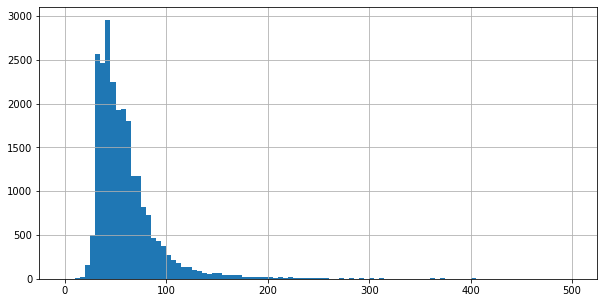

In [23]:
df['total_area'].hist(bins=100, range=(0,500), figsize=(10,5)) # гистограмма общей площади
df['total_area'].describe()

Распределение площади квартир близко к нормальному. В среднем представлены квартиры площадью от 30 до 100 кв.м., дальше частота сильно снижается, растягивается по гистограмме до 300 квадратов. Пик приходится на 50 метров - в целом, это соответствует стандартной площади типичной двухкомнатной квартиры. Есть максимальное значение в 900 квадратов - полагаю, либо это дворец, либо выброс, в гистограмму включать не стала.

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

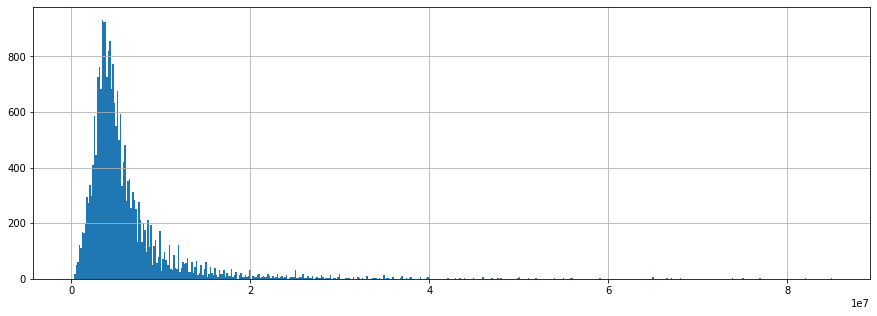

In [24]:
df['last_price'].hist(bins=500, range=(0,85000000), figsize=(15,5)) # гистограмма стоимости квартир
df['last_price'].describe()

Вмечатления от гистограммы смешанные, она скошена в правую сторону, основные значения сконцентрированы в пределах до 200 миллионов рублей. Есть в датасете и удивительно дорогие квартиры стоимостью более 800 миллионов, очень похоже на выброс (однако нужно проверять, вдруг для центра Петербурга такие цены в порядке вещей. Или продавец написал лишний ноль). Конечно, большая часть имеет цену до 100 миллионов рублей, выглядит реалистично. Других резких пиков в целом не наблюдается.

14    2
19    1
16    1
12    1
15    1
Name: rooms, dtype: int64

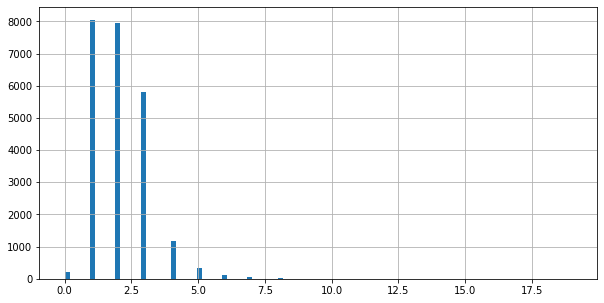

In [25]:
df['rooms'].hist(bins=100, figsize=(10,5)) # диаграмма количества комнат
df['rooms'].value_counts().tail()

Разброс комнат оказался от маленьких студий до огромного дворца из 19 помещений. А еще внезапно обнаружились нулевые значения. Самые распространенные оказались, ожидаемо, одно- и двухкомнатные квартиры.

count    23699.000000
mean         2.695876
std          0.216097
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.000000
Name: ceiling_height, dtype: float64

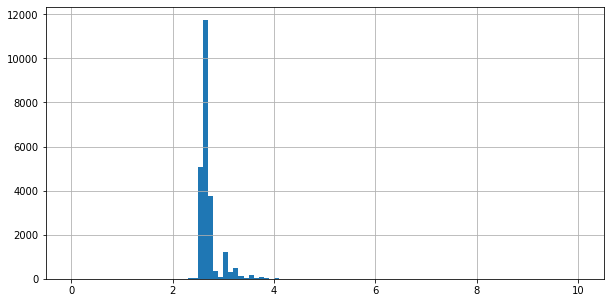

In [26]:
df['ceiling_height'].hist(bins=100, range=(0,10), figsize=(10,5)) # гистограмма высоты потолков
df['ceiling_height'].describe()

Здесь все предсказуемо, так как ранее я уже выравнивала высоту потолков и убрала выбросы, а также заполнила пропуски медианной высотой. Теперь потолки у нас среднестатистические от 2.5 метров до помпезных 4 метров.

### Сколько времени занимает в среднем продажа квартиры?

Обратимся к важной характеристике датасета - времени с объявления продажи до снятия публикации. Посмотрим гистограмму

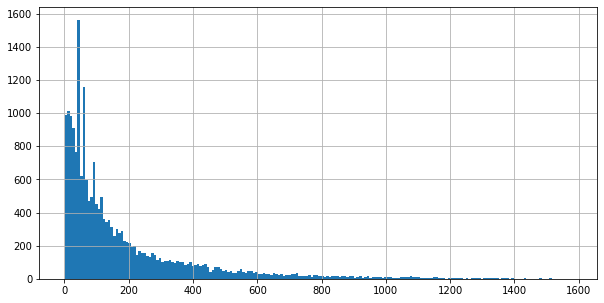

<AxesSubplot:>

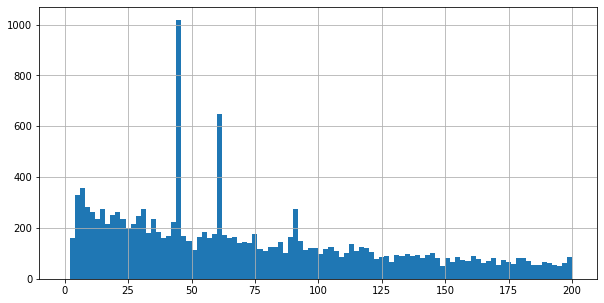

In [27]:
df['days_exposition'].hist(bins=200, figsize=(10,5)) # гистограмма количества дней публикаций
plt.show()
df['days_exposition'].hist(bins=100, range=(0,200), figsize=(10,5))

In [28]:
df['days_exposition'].value_counts().head(10) # уточняю значения пиков

45.0    880
60.0    538
7.0     234
30.0    208
90.0    204
4.0     176
3.0     158
5.0     152
14.0    148
9.0     143
Name: days_exposition, dtype: int64

Методом проб и ошибок подобрала количество корзин так, что на гистограмме выскочили необычные пики в диапазоне до 200 дней. Вывела отдельную гистограмму на этот диапазон - действительно, есть аномальные пики к 45 дню, 60, и примерно 90. Распределение близко к распределению Пуассона. Со стороны покупателей это объяснимо; вообще в целом квартиры с адекватным соотношением цена-качество долго не залеживаются. Пока что можно предположительно сказать, что в среднем продажа квартиры занимает до 400 дней. Вопрос вызывают пики... Их значения подозрительно точные (ну то есть цифры ровные, я очень сомневаюсь что люди покупают жилье именно на 45 день подачи объявления, а вот то что эти объявления могли уйти из базы по сроку - в это верится охотнее).

Уточню мысль выше. Столбец 'days_exposition' по факту не предполагает, что квартиру именно **продали** в этот срок. Он указывает, сколько дней это объявление было представлено на сервисе. А значит, чтооо в эти пиковые дни, скорее всего, у объявлений истек срок публикации! 

Поискала информацию в справке Яндекс.Недвижимости. Там действительно есть сроки размещения публикаций в 45, 60 и 90 дней, правда, не для региона Санкт-Петербург, для него значения немного другие. Нужно уточнить у сотрудников, давно ли они были введены, может эти данные раньше укладывались в общие сроки публикации...

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

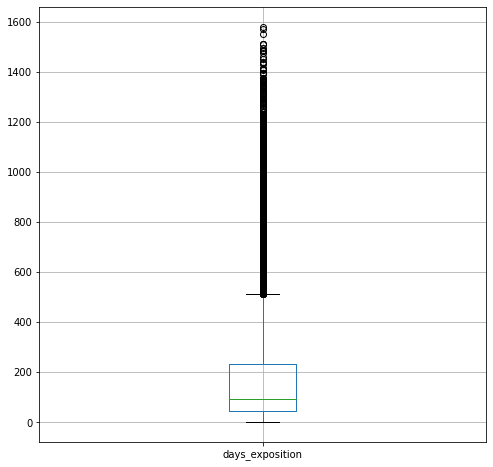

In [29]:
df.boxplot(column='days_exposition', figsize=(8,8)) # смотрим среднее и медиану
df['days_exposition'].describe()

Среднее значение времени продажи 180 дней, а медиана - 95 дней. Диаграмма размаха же иллюстрирует то, что нормальное время продажи квартиры укладывается в срок до 500 дней, значения выше представлены выбросами.

Пока что мне сложно разделить квартиры в аномальных пиках на те, которые были проданы от тех, которые сняли с публикации. Возможно, тут требуется дополнительная информация. Предлагаю избавиться от пиков, выделить "чистый" датафрейм и повторно произвести расчеты.

In [30]:
# тут у меня грустная история. Я долго думала, что делать с пропусками 'days_exposition', 
# заменять медианой выглядит некорректно на мой взгляд... так и так вылезет еще одна аномалия.
# Приняла решение пропуски удалить вовсе, чтобы не искажать работу в дальнейшем.
df = df.dropna(subset=['days_exposition'])
df['days_exposition'] = df['days_exposition'].astype('int')

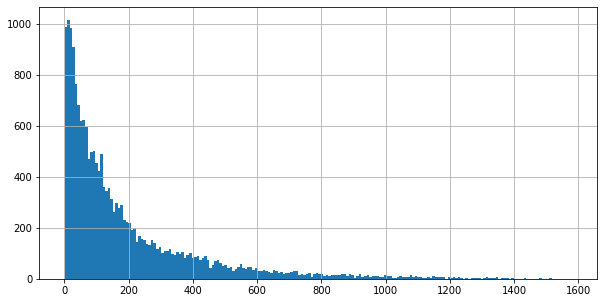

<AxesSubplot:>

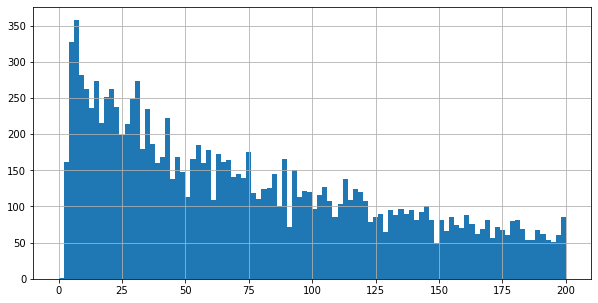

In [31]:
blacklist = [45, 60, 90] # список с нужными значениями
df = df.query('days_exposition not in @blacklist') # делаем срез данных без указанных значений
df['days_exposition'].hist(bins=200, figsize=(10,5)) # гистограммы по новому датафрейму
plt.show()
df['days_exposition'].hist(bins=100, range=(0,200), figsize=(10,5))

count    18896.000000
mean       191.640188
std        225.707795
min          1.000000
25%         41.000000
50%        110.000000
75%        252.000000
max       1580.000000
Name: days_exposition, dtype: float64

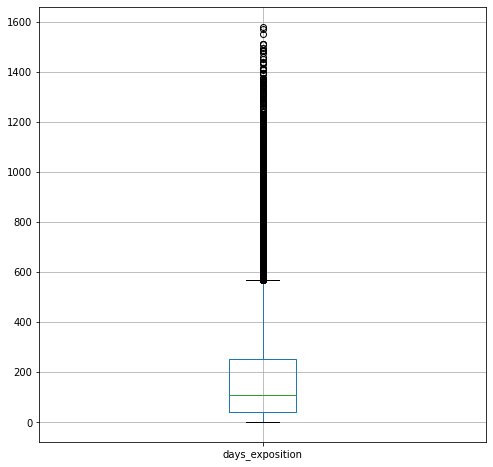

In [32]:
df.boxplot(column='days_exposition', figsize=(8,8))
df['days_exposition'].describe()
# среднее и медиана после отсечения выбросов

Ну что ж, теперь гистограмма выглядит аккуратной и равномерной, выбросов нет, а среднее время продажи и медиана выросли соответственно до 191 и 110 дней. Размах увеличился до 590 дней. 

В целом, можно сойтись на том, что активные продажи квартир происходят в срок до двух месяцев, что следует из гистограммы, но продажи до полутора лет в целом укладываются в показатели нормы. Все объявления, что висят дольше этого срока, можно отнести к необычно долгим продажам, на это указывает диаграмма размаха.

In [33]:
df['long_sale'] = df['days_exposition'] > 590
df['long_sale'].mean() # доля необычно долгих продаж

0.06599280270956816

Доля затянутых продаж всего шесть процентов от всех данных, что подтверждает выводы выше.

На основе графиков выше попробуем сделать срез данных, исключив обнаруженные аномальные значения и выбросы, и посмотрим, какую долю они составляют от всех данных.

In [34]:
df = df.query('total_area <= 200 and last_price <= 50000000 and (2.2 <= ceiling_height <= 4)')
df.shape[0]

18662

Мы убрали выбросы, но датасет несильно уменьшился, 78,7% данных вписались в условия и в целом подходят для дальнейшего анализа.

### Факторы, влияющие на стоимость квартиры

Интересно взглянуть, как различные факторы влияют на итоговую стоимость квартиры, для этого можно построить диаграмму рассеяния с  изучаемыми показателями, а также посчитать корреляцию между ними.
Для каждого параметра выведем два графика, один с общей ценой за квартиру, а второй - с ценой за квадратный метр.

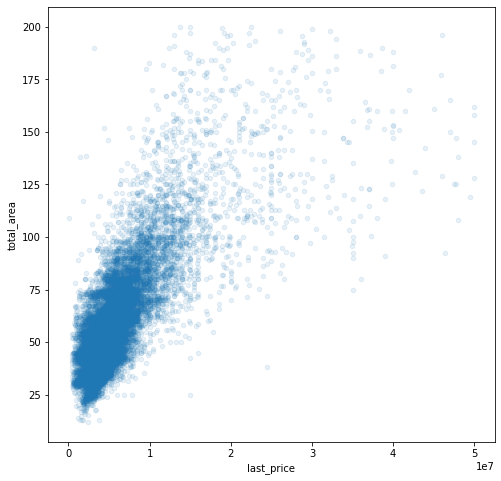

0.764724193381869

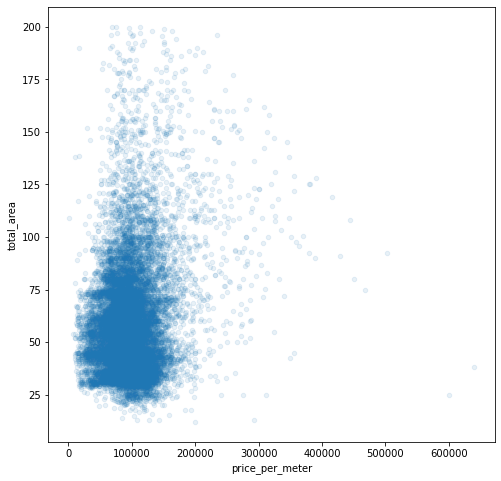

In [41]:
df.plot(x='last_price', y='total_area', kind='scatter', figsize=(8,8), alpha=0.1) # зависит ли цена квартиры от ее площади?
plt.show()
df.plot(x='price_per_meter', y='total_area', kind='scatter', figsize=(8,8), alpha=0.1)
df['last_price'].corr(df['total_area'])

Коэффициент Пирсона и диаграмма доказывают очевидные вещи: с увеличением площади увеличивается общая стоимость квартиры.

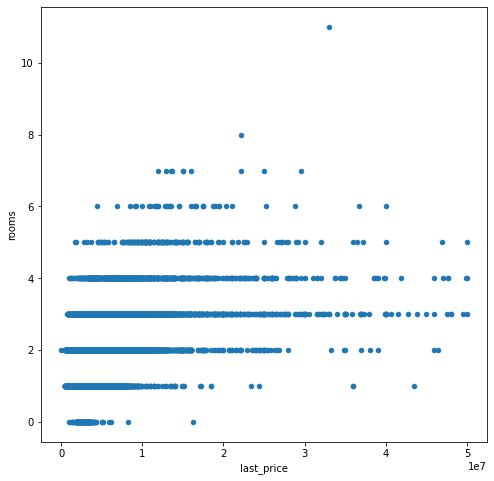

0.473121262092221

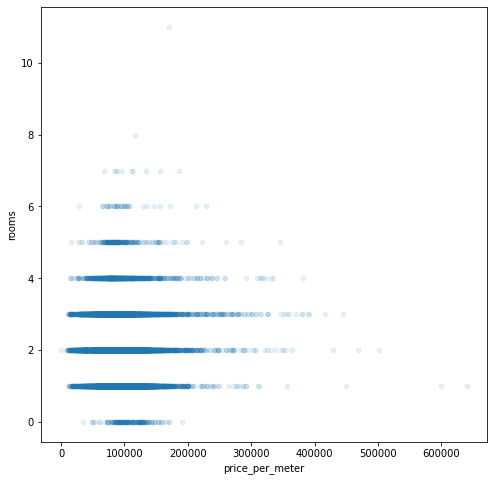

In [42]:
df.plot(x='last_price', y='rooms',kind='scatter', figsize=(8,8), alpha=1.0) # зависит ли цена квартиры от количества комнат?
plt.show()
df.plot(x='price_per_meter', y='rooms', kind='scatter', figsize=(8,8), alpha=0.1)
df['last_price'].corr(df['rooms'])

Между ценой и количество комнат корреляция незначительна, да, стоимость пятикомнатной квартиры будет больше типичной однушки, но в целом цены не сильно меняются. Вероятно, есть факторы, которые влияют на цену сильнее числа комнат.

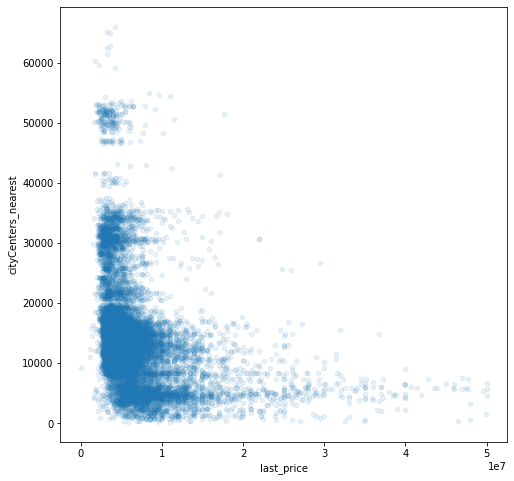

-0.3833890159971982

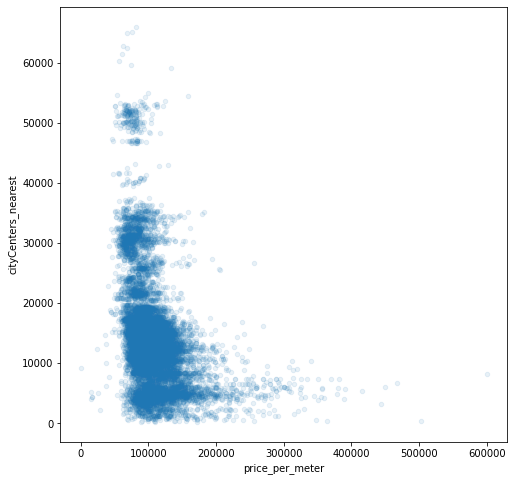

In [37]:
df.plot(x='last_price', y='cityCenters_nearest', kind='scatter', figsize=(8,8), alpha=0.1) 
plt.show()
df.plot(x='price_per_meter', y='cityCenters_nearest', kind='scatter', figsize=(8,8), alpha=0.1)

# зависит ли цена квартиры от ее расположения?
df['price_per_meter'].corr(df['cityCenters_nearest'])

Определенно, самые богатые и дорогие квартиры расположились в радиусе десяти километров от центра города! Именно здесь цена за квартиру в десять миллионов и выше не удивит никого, а вот за центром цены более демократичные (ну, если, конечно, ценники в пять миллионов вообще могут быть демократичными...).

In [38]:
# как на цену квартиры влияет ее этаж?
display(df.pivot_table(index='floor_category', values='price_per_meter', aggfunc='median'))
display(df.pivot_table(index='floor_category', values='last_price', aggfunc='median'))

,price_per_meter
floor_category,
Другой,97087
Первый,80952
Последний,88027


,last_price
floor_category,
Другой,4700000.0
Первый,3850000.0
Последний,4250000.0


Что следовало ожидать, квартира на первом этаже всегда стоит дешевле, чем на втором. И на любом другом кроме первого.

###  Зависимость цены от времени публикации

AxesSubplot(0.125,0.125;0.775x0.755)


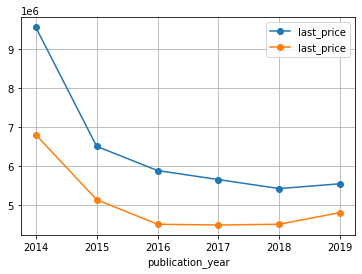

In [39]:
def date_plot(data, date):
    ax = (data
          .pivot_table(index=date, values='last_price')
          .plot(style='o-', label='mean', legend=True)
         )
    print(data
          .pivot_table(index=date, values='last_price', aggfunc='median')
          .plot(style='o-', grid=True, ax=ax, label='median', legend=True)
         )

# небольшая вычурная функция для выявления зависимости цен от года, месяца и дня недели публикации объявления
# решила сделать двойные графики, чтобы сравнить медианные цены со средними за определенный период
date_plot(df, df['publication_year'])

Цена за квартиры после 2014 года сильно упали; так как за последний год даны неполные данные (только до мая), то пока нельзя предположить, что в 2019 тенденция к падению цен сохранилась.

*Вопрос, почему в легенде графиков пишется last_price, а не указанные названия графиков? я думала, что будет то название, что указано в параметре label, но оно так не работает(*

AxesSubplot(0.125,0.125;0.775x0.755)


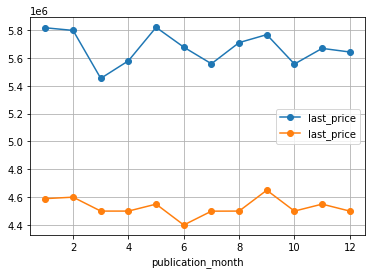

In [40]:
date_plot(df, df['publication_month']) # месяц публикации

AxesSubplot(0.125,0.125;0.775x0.755)


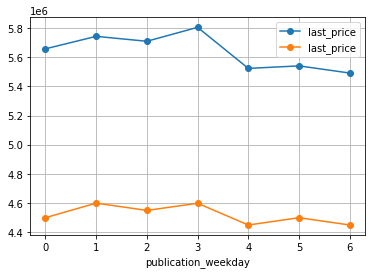

In [41]:
date_plot(df, df['publication_weekday']) # день недели публикации

**Итак**, на итоговую цену квартиры больше всего влияют ее *площадь* и *близость к центру города*. Дешевле всего стоят квартиры в спальном районе или пригороде (что логично), однокомнатные, также сделают скидку за первый этаж.

**Вывод по дате размещения**: ничего однозначного сказать нельзя. Есть спад цены за квадратный метр за годовой период, но нет зависимости между ценой и месяцем публикации, средние значения указывают, что самые дешевые цены выставляют в пятницу, а дорогие - в субботу. В марте и октябре наблюдается спад цен.


### Населенные пункты с самым большим числом публикаций

In [42]:
# находим 10 населенных пунктов с самым большим количество объявлений
big_locations = df.pivot_table(index='locality_name', values='price_per_meter', aggfunc=['count', 'mean'])
big_locations.columns = ['count', 'mean']
big_locations = big_locations.sort_values(by='count',ascending=False).head(10)

big_locations

,count,mean
locality_name,,
Санкт-Петербург,12533,109732.247507
посёлок Мурино,482,85653.593361
посёлок Шушары,372,78177.712366
Всеволожск,308,68453.288961
Пушкин,285,102325.663158
Колпино,275,75015.374545
деревня Кудрово,267,92169.936330
посёлок Парголово,265,90035.158491
Гатчина,245,67458.522449


Больше половины всех объявлений в датасете локализованы в Санкт-Петербурге, далее количество сильно падает, а десятку занимает Выборг. Сравним среднюю цену квадратного метра в этих населенных пунктах.

In [43]:
print(big_locations[big_locations['mean'] == big_locations['mean'].max()], # максимальная цена за квадратный метр
      big_locations[big_locations['mean'] == big_locations['mean'].min()], sep='\n\n'  # и минимальная
     )


                 count           mean
locality_name                        
Санкт-Петербург  12533  109732.247507

               count          mean
locality_name                     
Выборг           177  56929.553672


Самая большая стоимость жилья, как оказалось, в Санкт-Петербурге (удивительно!). А самая низкая - в Выборге, причем дешевле в два раза за метр! Так что за ту же стоимость в Питере можно купить целых две квартиры в области.

### Выделение центральной зоны в Санкт-Петербурге

<AxesSubplot:xlabel='center_nearest_km'>

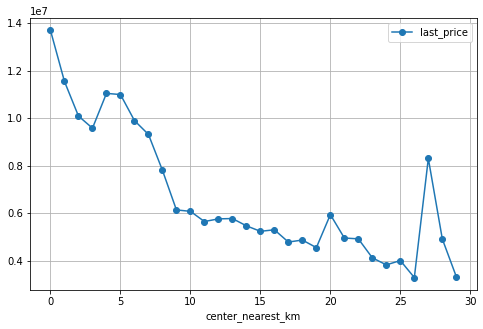

In [65]:
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(0)
df['center_nearest_km'] = (df['cityCenters_nearest'] / 1000).astype('int', errors='ignore') # тут столбец с расстоянием до центра в км

#df['center_nearest_km'] = df['center_nearest_km'].fillna(0).astype('int')
# срез по Санкт-Петербургу и график по сводной таблице средних цен в зависимости от расстояния
(df
 .query('locality_name == "Санкт-Петербург"')
 .pivot_table(index='center_nearest_km', values='last_price')
 .plot(style='o-',grid=True, figsize=(8,5))
)

На графике виден резкий спад ценника после 8 километра, попробуем еще построить столбчатый график.

<AxesSubplot:xlabel='center_nearest_km'>

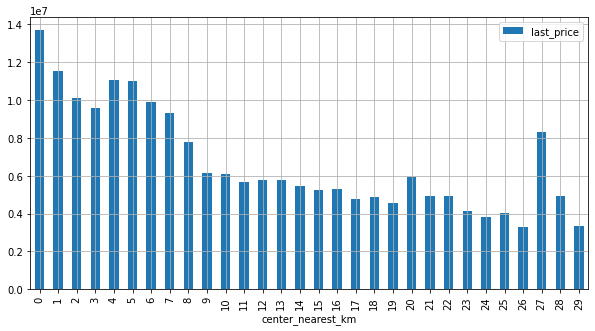

In [56]:
(df
 .query('locality_name == "Санкт-Петербург"')
 .pivot_table(index='center_nearest_km', values='last_price')
 .plot(kind='bar', grid=True, figsize=(10,5))
)
# то же что и в предыдущем шаге, но с другим типом графика

В общем, я бы сказала, что радиус центра укладывается в рамки до восьми километров, дальше начинается заметный спад в цене. Никогда не была в Санкт-Петербурге, поэтому решила еще почитать статьи, что именно считается центром, попробовала построить маршруты в 2гис, и, кажется, мой вывод похож на правду. Поэтому для дальнейшего среза данных будем считать границей центральной зоны дальность 7 километров.

###  Изучение объявлений в центре Санкт-Петербурга

In [64]:
df_spb = df.query('locality_name == "Санкт-Петербург" and center_nearest_km <= 8')
# получили срез по центральной зоне

Интересно будет взглянуть, отличаются ли данные по выборке от общих данных. Изучим те же параметры, что и в предыдущих разделах, но уже в границах центра Питера.

count    2741.000000
mean       79.385826
std        35.080487
min        12.000000
25%        52.000000
50%        72.200000
75%        98.000000
max       200.000000
Name: total_area, dtype: float64

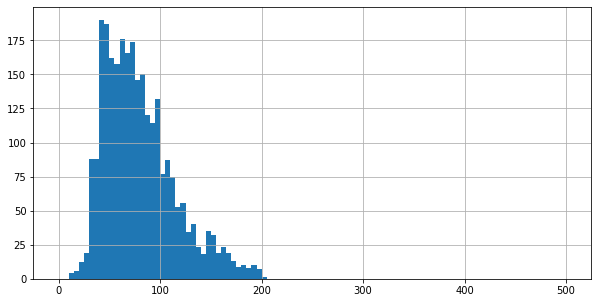

In [47]:
df_spb['total_area'].hist(bins=100, range=(0,500), figsize=(10,5)) # гистограмма по общей площади квартири
df_spb['total_area'].describe()

Площадь центральных квартир в целом выше, медианное значение - 72 квадратf против предыдущих пятидесяти. После 100 квадратных метров частота сильно падает. Вот и один из показателей, почему в центре дороже жить.

count    2.741000e+03
mean     1.051430e+07
std      7.197136e+06
min      1.600000e+06
25%      6.200000e+06
50%      8.300000e+06
75%      1.205400e+07
max      5.000000e+07
Name: last_price, dtype: float64

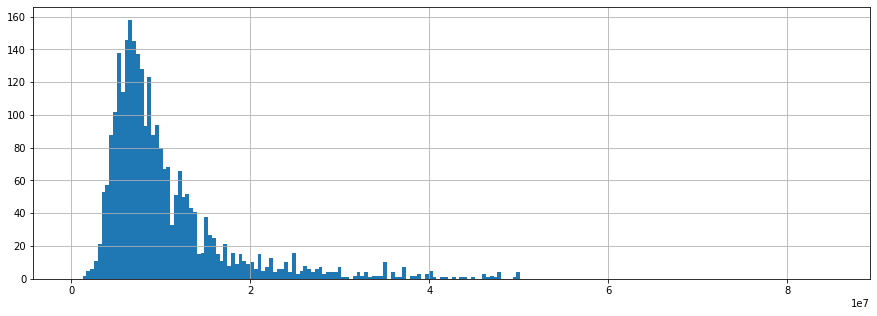

In [48]:
df_spb['last_price'].hist(bins=200, range=(0,85000000), figsize=(15,5)) # гистограмма стоимости квартир
df_spb['last_price'].describe()

Именно в центре расположились самые дорогие и сочные варианты жилья. Медианная цена в центре почти в два раза выше, чем во всем датафрейме. Основные цены сконцентрированы в пределах до двухсот миллионов рублей, дальше уже находятся единичные предложения с супер завышенной ценой, то ли из-за ремонта, то ли из-за площади или расположения, а может продавец просто недобросовестный и заламывает цены...

<AxesSubplot:>

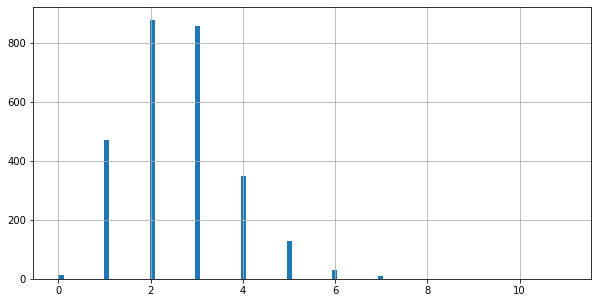

In [49]:
df_spb['rooms'].hist(bins=100, figsize=(10,5)) # гистограмма по количеству комнат

Больше всего двух- и трехкомнатных квартир. Отличается от предыдущих выводов, там чаще всего продавались именно однушки.

count    2741.000000
mean        2.887140
std         0.313357
min         2.400000
25%         2.650000
50%         2.750000
75%         3.080000
max         4.000000
Name: ceiling_height, dtype: float64

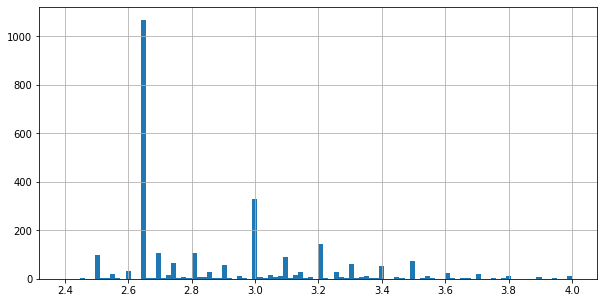

In [50]:
df_spb['ceiling_height'].hist(bins=100, figsize=(10,5)) # гистограмма высоты потолков
df_spb['ceiling_height'].describe()

И потолки в центре немного повыше, и трава зеленее... Но медиана поднялась всего на 15 сантиметров, так что с потолками никаких удивлений нет, все укладывается в ожидаемые нормы.

In [66]:
df_spb.pivot_table(index='floor_category', values='last_price', aggfunc='median')
# влияет ли этаж на цену?

,last_price
floor_category,
Другой,8449000.0
Первый,5900000.0
Последний,8150000.0


Квартиры на первом этаже все так же дешевле прочих, причем довольно ощутимо для кошелька.

<AxesSubplot:xlabel='cityCenters_nearest', ylabel='last_price'>

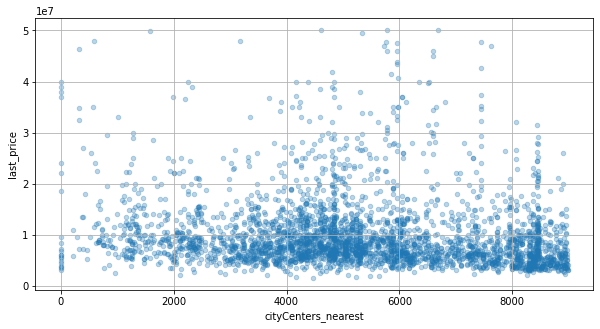

In [71]:
(df_spb.plot(x='cityCenters_nearest', y='last_price', kind='scatter', grid=True, alpha=0.3, figsize=(10,5))
)
# зависимость цены за квадратный метр от расположения

<AxesSubplot:xlabel='cityCenters_nearest', ylabel='price_per_meter'>

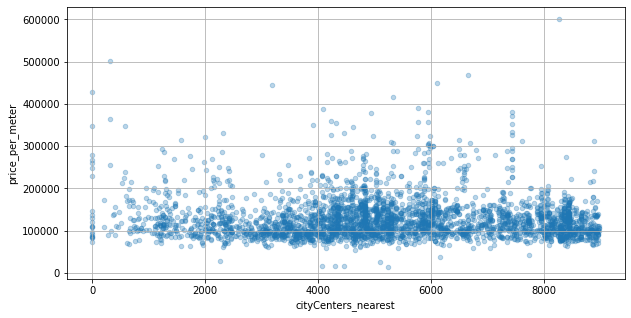

In [68]:
(df_spb.plot(x='cityCenters_nearest', y='price_per_meter', kind='scatter', grid=True, alpha=0.3, figsize=(10,5))
)
# зависимость цены за квадратный метр от расположения

Диаграмма показывает то, что мы уже выделили в отдельный срез: цены не сильно отличаются в зависимости от удаленности от центра, ведь мы изучаем только центр; в самом сердце Питера объявлений немного, на четвертом километре предложений больше, но нигде нет сильно выбивающихся данных (кроме наших дворцов, разумеется) 

AxesSubplot(0.125,0.125;0.775x0.755)


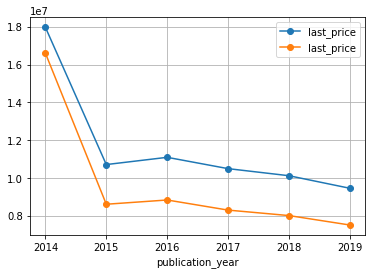

In [53]:
date_plot(df_spb, df_spb['publication_year']) # зависимость цен от года публикации

AxesSubplot(0.125,0.125;0.775x0.755)


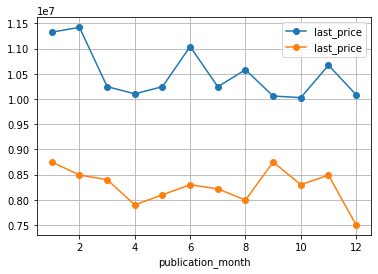

In [54]:
date_plot(df_spb, df_spb['publication_month']) # зависимость цен от месяца публикации

AxesSubplot(0.125,0.125;0.775x0.755)


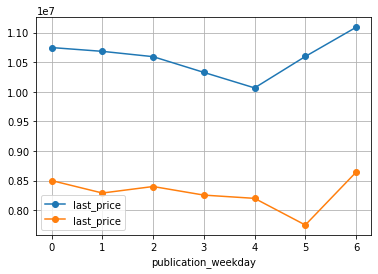

In [55]:
date_plot(df_spb, df_spb['publication_weekday']) # зависимость цен от дня недели публикации

Что касается времени размещения объявлений, то здесь так же наблюдается общий спад цен; судя по медиане ни месяц, ни день недели на цену не влияют, а вот если смотреть на средний показатель, то самые дорогие объявления публикуются в апреле и декабре, а особенно по субботам. Март и октябрь остаются самыми дешевыми месяцами, как и раньше.

*Вывод* - очевидно, квартиры в центре Питера на голову дороже остальных представленных. В сравнении с предыдущими расчетами нет какой-то значимых различий на мой взгляд, кроме того, что цены в целом выше на пару десятков тысяч за квадратный метр, и на несколько миллионов по итоговой стоимости. Стоит отметить, что здесь больше распространены двух- и трехкомнатные квартиры против студий за центром. В остальном выборка не отличается от общих данных.

## Общий вывод

Что хотелось бы сказать в конце всей проделанной работы? Мы выяснили, что в датасете сохраняются публикации независимо от того, был факт продажи или нет: так мы избавились от выбросов на 45, 60 и 90 день публикации. Заполнили пропуски там, где это было уместно, и в дальнейшем изучили распределение цен за квартиры и факторы, которые влияют на ее формирование. 
* В центре жить дороже: стоимость квартир за квадратный метр выше в среднем на треть от общей выборки. На нее влияет как расположение, так и общая площадь жилья в прямой зависимости.
* За центром ситуация аналогичная, однако цена за квадратный метр дешевле, разнообразия больше; если кто-то захочет приобрести жилье в Санкт-Петербурге, я бы предложила выбирать из диапазона 9 км от центра и дальше - там ценники ближе к народу, так сказать.
* Больше всего однокомнатных квартир, кроме центра - там преимущественно продаются двушки и трёшки.
* Независимо от расположения покупать квартиру на первом этаже дешевле, чем на любом другом.
* Скорее всего, в данных присутствуют аномалии в итоговой цене: стоит отнестись скептически к ценнику выше двухсот миллионов рублей *(это, конечно, удел богатых, но тем не менее вывод очень важен. Я пробовала убирать объявления с явно завышенной ценой, но общий вывод и результаты графиков от этого не сильно менялись, поэтому я оставила их в данных)*
* При желании сэкономить стоит мониторить объявления в марте и сентябре: можно приобрести жилье выгоднее, так как цена за квадратный метр в этот период снижается.
Для покупателя: всегда стоит ориентироваться на стоимость за квадратный метр и на рыночную стоимость по району, это поможет избежать лишних расстройств и переплат. Медианная стоимость квартир в Санкт-Петербурге - 8.6 миллионов, в пригороде - 4.5 миллиона рублей, средние цены - 14 и 6.5 миллиона соответственно. Переплата за престиж очевидна, так что всегда стоит остановить себя и подумать - стоит ли оно того?